In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np

In [2]:
y_test = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/output/y_test.csv')
y_test = y_test['target'].tolist()

In [3]:
y_test_pred_naive = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_naive.csv', header=None).values
y_test_pred_lr = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_lr.csv', header=None).values
y_test_pred_lgbm = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_lgbm.csv', header=None).values
y_test_pred_gbr = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_gbr.csv', header=None).values
y_test_pred_xgb = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_xgb.csv', header=None).values
y_test_pred_rfr = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_rfr.csv', header=None).values
y_test_pred_st = pd.read_csv('/content/drive/MyDrive/Final_project_of_the_first_year_of_study/google-colab/y_test_pred/y_test_pred_st.csv', header=None).values

[457380.98, 256572.22, 89635.88, 92532.03, 98061.31, 61852.55, 64070.38]

[241.69, 69.3, 21.93, 23.49, 23.74, 15.26, 15.64]

[0.0, 0.08, 0.81, 0.8, 0.79, 0.85, 0.84]

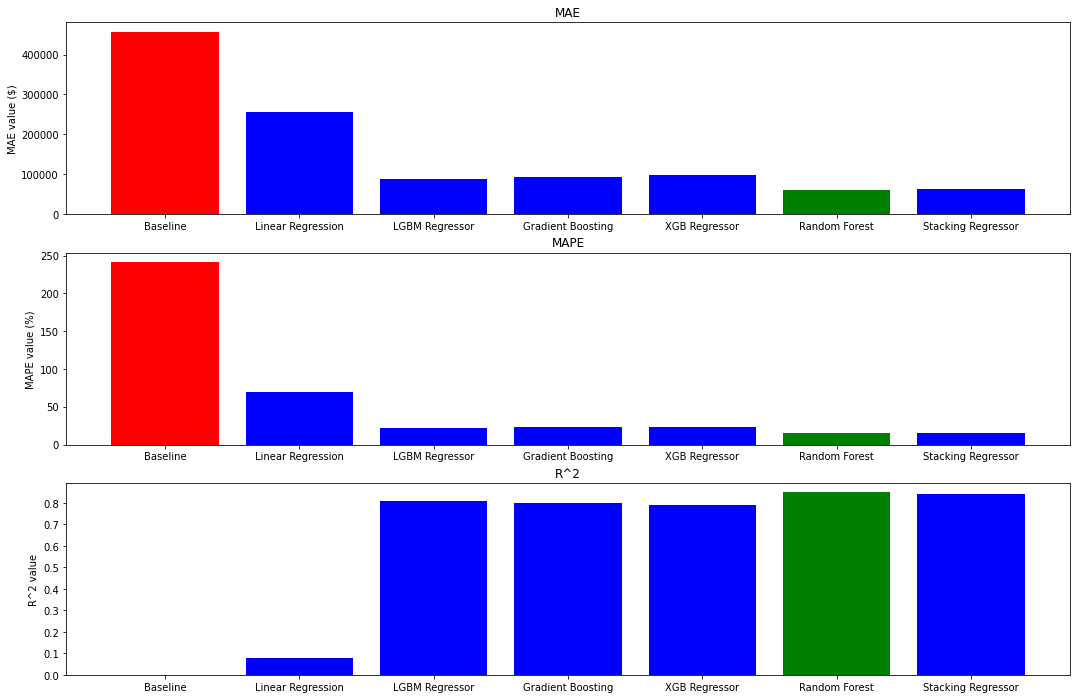

In [4]:
field_names = ['Baseline', 'Linear Regression', "LGBM Regressor", "Gradient Boosting",
               'XGB Regressor', 'Random Forest', 'Stacking Regressor']

# Создадим рисунок и подзаголовки.
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 12))

# Извлекём данные для каждого измерения.
mae = [round(metrics.mean_absolute_error(y_test, y_test_pred_naive), 2), 
       round(metrics.mean_absolute_error(y_test, y_test_pred_lr), 2), 
       round(metrics.mean_absolute_error(y_test, y_test_pred_lgbm), 2), 
       round(metrics.mean_absolute_error(y_test, y_test_pred_gbr), 2), 
       round(metrics.mean_absolute_error(y_test, y_test_pred_xgb), 2), 
       round(metrics.mean_absolute_error(y_test, y_test_pred_rfr), 2), 
       round(metrics.mean_absolute_error(y_test, y_test_pred_st), 2)]
mape = [round(metrics.mean_absolute_percentage_error(y_test, y_test_pred_naive)*100, 2), 
        round(metrics.mean_absolute_percentage_error(y_test, y_test_pred_lr)*100, 2), 
        round(metrics.mean_absolute_percentage_error(y_test, y_test_pred_lgbm)*100, 2), 
        round(metrics.mean_absolute_percentage_error(y_test, y_test_pred_gbr)*100, 2), 
        round(metrics.mean_absolute_percentage_error(y_test, y_test_pred_xgb)*100, 2), 
        round(metrics.mean_absolute_percentage_error(y_test, y_test_pred_rfr)*100, 2), 
        round(metrics.mean_absolute_percentage_error(y_test, y_test_pred_st)*100, 2)]
r2 = [round(metrics.r2_score(y_test, y_test_pred_naive), 2), 
      round(metrics.r2_score(y_test, y_test_pred_lr), 2), 
      round(metrics.r2_score(y_test, y_test_pred_lgbm), 2), 
      round(metrics.r2_score(y_test, y_test_pred_gbr), 2), 
      round(metrics.r2_score(y_test, y_test_pred_xgb), 2), 
      round(metrics.r2_score(y_test, y_test_pred_rfr), 2), 
      round(metrics.r2_score(y_test, y_test_pred_st), 2)]

display(mae)
display(mape)
display(r2)

# Создадим bar plots.
_ = ax1.bar(field_names, mae, color=['r', 'b', 'b', 'b', 'b', 'g', 'b'])
_ = ax2.bar(field_names, mape, color=['r', 'b', 'b', 'b', 'b', 'g', 'b'])
_ = ax3.bar(field_names, r2, color=['r', 'b', 'b', 'b', 'b', 'g', 'b'])

# Добавим заголовок и метки к графикам.
_ = ax1.set_title("MAE")
_ = ax1.set_ylabel("MAE value ($)")
_ = ax2.set_title("MAPE")
_ = ax2.set_ylabel("MAPE value (%)")
_ = ax3.set_title("R^2")
_ = ax3.set_ylabel("R^2 value")

# Покажем графики.
plt.show()

In [7]:
def best_model():
  for i in range(len(r2)):
    if r2[i] == np.max(r2):
      return(field_names[i], mae[i], mape[i], r2[i])

best_model()

('Random Forest', 61852.55, 15.26, 0.85)

In [9]:
print(
f'''ВЫВОД

    1. Наилучшие результаты показывает модель {best_model()[0]}. Средняя абсолютная погрешность 
составляет {best_model()[1]} долларов, что довольно много. Тем не менее, это намного 
(почти в {round(mae[0]/best_model()[1])} раз) лучше, чем базовый уровень. Средняя абсолютная процентная 
погрешность составляет {best_model()[2]}%. Оценка  R2  (коэффициент детерминации) показывает 
относительно хорошие {best_model()[3]} (по шкале от -1 до 1).
    2. В целом целью проекта была контейнеризация приложений для воспроизводимости кода.
    3. Другой целью проекта была демонстрация подбора гиперпараметров для различных моделей с помощью 
платформы оптимизации гиперпараметров Optuna.''')

ВЫВОД

    1. Наилучшие результаты показывает модель Random Forest. Средняя абсолютная погрешность 
составляет 61852.55 долларов, что довольно много. Тем не менее, это намного 
(почти в 7 раз) лучше, чем базовый уровень. Средняя абсолютная процентная 
погрешность составляет 15.26%. Оценка  R2  (коэффициент детерминации) показывает 
относительно хорошие 0.85 (по шкале от -1 до 1).
    2. 
